<a href="https://colab.research.google.com/github/reeda23/Open-CV101-OpenCV-Basics/blob/main/5_rotation_with_openCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

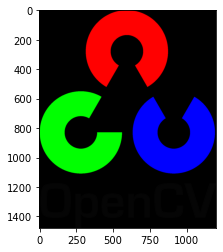

In [2]:
#load an image
image = cv2.imread("/content/drive/MyDrive/OpenCV101 - Basics of OpenCV/openCVLogo.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [3]:
#getting the dimensions of image

(h,w) = image.shape[:2]

#to get the center of the image

(centerX, centerY) = ( w //2 , h //2)

Text(0.5, 1.0, 'Rotated image')

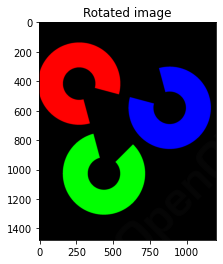

In [4]:
#rotating the image by 45 degrees around the center
#defining the matrix

M = cv2.getRotationMatrix2D((centerX, centerY), 45, 1.0)
rotated_image = cv2.warpAffine(image, M, (w,h))
plt.imshow(rotated_image)
plt.title('Rotated image')

Text(0.5, 1.0, 'Rotated image by -90 degrees')

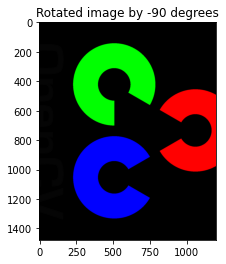

In [5]:
#rotate the image by -90 degrees around the center

M = cv2.getRotationMatrix2D((centerX, centerY),-90,1.0)
rotated_image = cv2.warpAffine(image, M, (w,h))
plt.imshow(rotated_image)
plt.title("Rotated image by -90 degrees")

Text(0.5, 1.0, 'Rotated image at 45 degrees around 20x20')

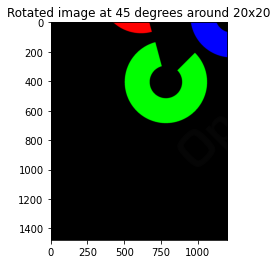

In [6]:
#rotate image around arbitrary point

M = cv2.getRotationMatrix2D((20,20), 45, 1.0)
rotated_image = cv2.warpAffine(image, M, (w,h))
plt.imshow(rotated_image)
plt.title("Rotated image at 45 degrees around 20x20")

Rotate image without cropping


In [7]:
def rotate_without_cropping(image, angle):

    #get the image dimensions
    (h, w) = image.shape[:2]

    #assuming we want to rotate with respect to center
    (cX, cY) = (w/2, h/2)

    #get the rotation matrix, apply neagtive to the angle to rotate it clockwise
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)    

    #get sine and cosine
    cos = np.abs(M[0,0])
    sin = np.abs(M[0,1])

    #calculate the new dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    #adjusting the rotation matrix to consider translation
    M[0,2] +=  (nW / 2) - cX  
    M[1,2] +=  (nH / 2) - cY

    return cv2.warpAffine(image, M, (nW, nH))




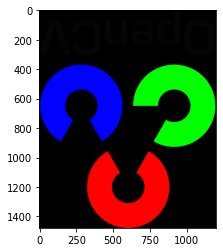

In [8]:
rotate = rotate_without_cropping(image, 180)
plt.imshow(rotate)